# Name- Nirmal Kumar                                                           

# <span style="color:brown">Evaluation Project - 3 :Census Income

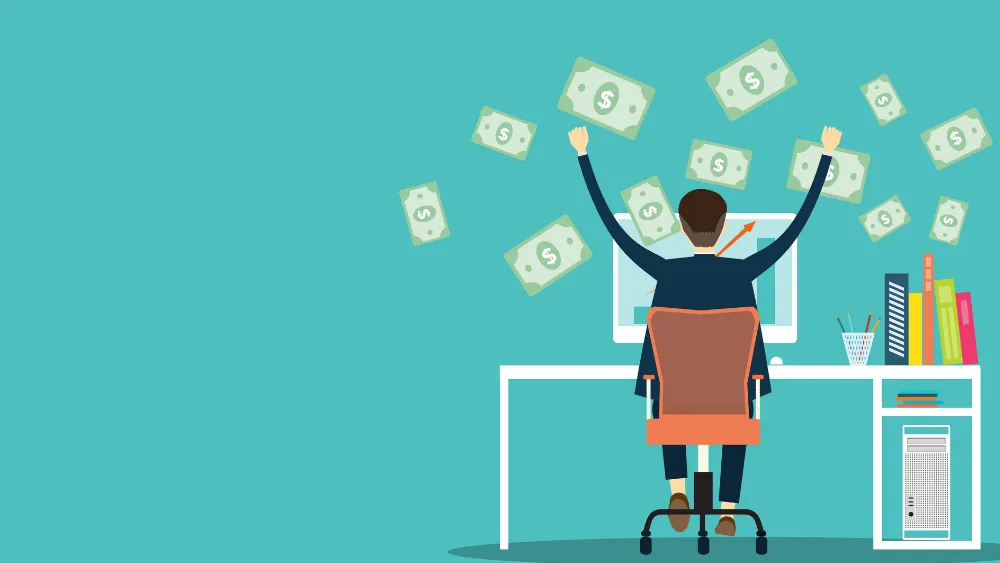

# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv



# <span style='background :gold' >--------------------------------------------Documentation-----------------------------------------------</span>

### <span style='background :gold' >Dataset Overview 
    
 Name  - Census Income             
 Format- CSV                   
 Size  - Rows-32560 and Column-15                 

### <span style='background :gold' >Variables                       
    
  ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
   'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
   'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
    'Income'],

### <span style='background :gold' >Data Cleaning and Preprocessing 

 Prior to analysis, the dataset underwent cleaning and preprocessing steps like:               
 - Checking & Removing Dublicate Values(Total Dublicate rows are: 24).                 
 - Checking numbers of unique values in each column.            
 - Handling Blank Space(i.e '?') in following columns :                   
    Occupation       (1843            
    Workclass        (1836)                                  
    Native_country   (582)               
    
 -Data Visualization:               
    Univariate Analysis                 
    Bivariate Analysis                           
    Multivariate Analysis                  
    Outliers Analysis                  
    
 -Removing Outliers Z-score & Inter Quantile Range.               
 -Checking and Removing Skewness using PowerTransformer.                   
    
### <span style='background :gold' >Training:
    
 - Training Process:        
    - Encoding Categorical Variable (By Using LabelEncoder & OrdinalEncoder)   
    - Feature Selection by Visualizing Correlation by using heatmap.
    - Seperating Feature and Label.
    - Feature Scaling Using Standard Scaler
    - Checking Multicollinearity by using VIF method.
    - Feature Selection by SelectKBest (8 Column remaining).
    - Data Balance by Oversampling.
    -Train on different different model
    
 -Training Data: Rows & Column (33086, 8)  (Oversampling)
    
### <span style='background :gold' >Evaluation
    
 - Metrics:          
    - Use accuracy_score, confusion_matrix,        
    - Classification Report and AUC ROC curve            
    used to evaluate the performance of the model.
    
### <span style='background :gold' >Model Performance : 
    
  Out of all model,RandomForestClassifier & GradientBoostingClassifier perform best for this dataset.
   - AUC-ROC curve- Both model have same (i.e 0.93) AUC-ROC score
   - Accuracy Before Hyperparameter Tunning :
    - RandomForestClassifier : 86% 
    - GradientBoostingClassifier: 85% 
   - Accuracy After Hyperparameter Tunning :
    - RandomForestClassifier :    83% 
    - GradientBoostingClassifier: 88%         
   Hence our final model is GradientBoostingClassifier. 
    -Confusion Matrix of GradientBoostingClassifier:        
     [[6047  1026]                      
     [ 655  6452]]      
    
### <span style='background :gold' >Conclusion: 

This case study dataset provides for predict whether a person makes over $50K a year which is categorical data.                        
It is clearly a Classification problem where "Income" is target column and remaining columns are features.                  
GradientBoostingClassifier perform well with accuracy score 88% with less Type 1 and 2 Error. The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.


# <span style='background :gold' >----------------------------------------------------------------------------------------------------------------</span>

# <span style="color:purple">Python Implementation

In [449]:
#Import Necessary Libraries

#Data Visualization
import pandas as pd
import numpy as np

#Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

#Ignore Unnecessary warning
import warnings
warnings.filterwarnings("ignore")

In [450]:
#Importing Country-Code Dataset
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

df.head()# Getting top 5 records

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [451]:
 df.tail() #Getting last 5 records

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## <span style="color:purple">Exploratory Data Analysis (EDA)

In [452]:
print('Total number of Rows & Columns', df.shape)
print('\n Columns name are :', df.columns)

Total number of Rows & Columns (32560, 15)

 Columns name are : Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


In [453]:
#Getting Information Of Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<span style="color:BLUE">Observation -
- There are two data types present in dataset:(object,int64).             

In [454]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df.duplicated().sum())

Total Dublicate rows are: 24


In [455]:
#Droping Duplicate values in DataFrame
df = df.drop_duplicates()

In [456]:
df.shape

(32536, 15)

In [457]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

<span style="color:blue">Observation -   
- There is '?' as  Blank space present in dataset. Let's convert into NaN value.
- As we can see 'Education' and 'Education_num' are actually same column. Since Education is like Ordinal features.
    Hence drop 'Education_num' column.

In [458]:
#Dropping 'Education_num' column
df.drop(['Education_num'], axis=1 ,inplace =True)
df.shape

(32536, 14)

In [465]:
# '?' in Workclass Column
blank_value =df.loc[df.Workclass ==' ?']
blank_value

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [468]:
# '?' in Occupation Column
blank_value =df.loc[df.Occupation ==' ?']
blank_value

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [469]:
# '?' in Native_country Column
blank_value =df.loc[df.Native_country ==' ?']
blank_value.T

,13,37,50,60,92,244,248,296,392,452,...,32212,32231,32253,32306,32412,32448,32468,32491,32509,32524
Age,40,31,18,32,30,56,45,39,34,42,...,28,30,31,42,45,44,58,42,39,81
Workclass,Private,Private,Private,?,Private,Private,Private,?,State-gov,Private,...,Private,Private,Private,Self-emp-inc,Private,Self-emp-inc,Self-emp-inc,Self-emp-not-inc,Private,?
Fnlwgt,121772,84154,226956,293936,117747,203580,153141,157443,98101,197583,...,175710,215441,251659,191196,199590,71556,181974,217597,107302,120478
Education,Assoc-voc,Some-college,HS-grad,7th-8th,HS-grad,HS-grad,HS-grad,Masters,Bachelors,Assoc-acdm,...,Bachelors,Some-college,Some-college,Bachelors,5th-6th,Masters,Doctorate,HS-grad,HS-grad,Assoc-voc
Marital_status,Married-civ-spouse,Married-civ-spouse,Never-married,Married-spouse-absent,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,...,Never-married,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Divorced,Married-civ-spouse,Divorced
Occupation,Craft-repair,Sales,Other-service,?,Sales,Adm-clerical,Adm-clerical,?,Exec-managerial,Exec-managerial,...,Adm-clerical,Adm-clerical,Other-service,Exec-managerial,Machine-op-inspct,Sales,Prof-specialty,Sales,Prof-specialty,?
Relationship,Husband,Husband,Own-child,Not-in-family,Wife,Husband,Husband,Wife,Husband,Husband,...,Not-in-family,Not-in-family,Husband,Husband,Husband,Husband,Not-in-family,Own-child,Husband,Unmarried
Race,Asian-Pac-Islander,White,White,White,Asian-Pac-Islander,White,White,Asian-Pac-Islander,White,Black,...,White,Other,Asian-Pac-Islander,White,White,White,White,White,White,White
Sex,Male,Male,Female,Male,Female,Male,Male,Female,Male,Male,...,Female,Male,Male,Male,Male,Male,Female,Male,Male,Female
Capital_gain,0,0,0,0,0,0,0,3464,7688,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
#Convert '?' into NaN value using regex
df.replace(r'^\s*\?+\s*$', np.nan, regex=True, inplace=True)

In [471]:
#Number of Null Values in each column
print(df.isna().sum())

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64


<span style="color:blue">Observation -
- Column 'Workclass','Occupation','Native_country' has null values. Let's fill these null values by mode method.
Since they are categorical column.

In [472]:
#Fill Nan value by mode method
df[[ 'Workclass','Occupation','Native_country' ]]=df[[ 'Workclass','Occupation','Native_country' ]].fillna(df[[ 'Workclass','Occupation','Native_country' ]].mode().iloc[0])

In [473]:
# Checking Number of Null Values in each column again
print(df.isna().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


<span style="color:blue">Observation -
- Hence No Null value are present in the dataset. Lets go ahead.

In [474]:
#Statical summary of numerical feature
df.describe()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


<span style="color:blue">Observation -From the above description , we can observe the following things:          
- No Missing values are present in all numerical column .                      
- Data Distribution is Right Skewed in 'Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss' column(The mean value is greater than median(50%)).    
- There is difference in 75% and max value in few columns ,it means Outliers are present in the dataset. 
                  
We will see Skewness and Outliers again by visualization.           

In [475]:
#Seperating Numerical and Categorical column

#checking for Categorical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_column",categorical_col)
print("\n")

#checking for Numerical column
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical_column",numerical_col)

Categorical_column ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical_column ['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


## <span style="color:purple">Data Visualization

### UNIVARIATE ANALYSIS

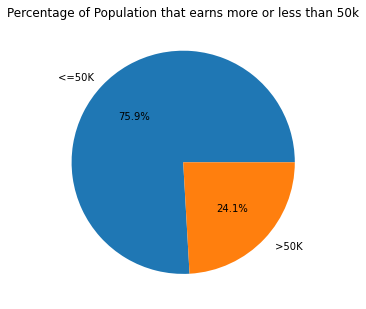

In [478]:
#Visualize Income i.e Target variable 
plt.figure(figsize = (5,10))
Ls= df["Income"].value_counts()
plt.pie(Ls.values, labels= Ls.index, data=df, autopct='%1.1f%%')
plt.title("Percentage of Population that earns more or less than 50k")
plt.show()

<span style="color:BLUE">Observation :              
- 75.9% of Population are failed to earn $50K or more over a year.                  
  It is considered as Binaryclass Classification Problem where classes are not balance(No.of Person that earns more than 50K is very less in number).               
We will balance the class by SMOTE() method later.

In [479]:
#Create a method to check for Data distribution,Relationship and Boxplot in each numerical feature columns
def numeric_plot(df,i):
    plt.figure(figsize = (15,5))
    
    # Histplot 
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df,kde=True,color='blue')
    plt.xlabel (i, fontsize =15)
    plt.grid(axis='y')
    
    # ScatterpLot 
    plt.subplot(1,3,2)
    sns.kdeplot(x=i,hue="Income",data =df)
    plt.xlabel (f'{i} vs Income', fontsize =15)
    plt.grid()
    
    # Boxplot 
    plt.subplot(1,3,3)
    sns.boxplot(y=i, data=df, palette="Set2_r")
    plt.xlabel (i, fontsize =15)
    plt.show()

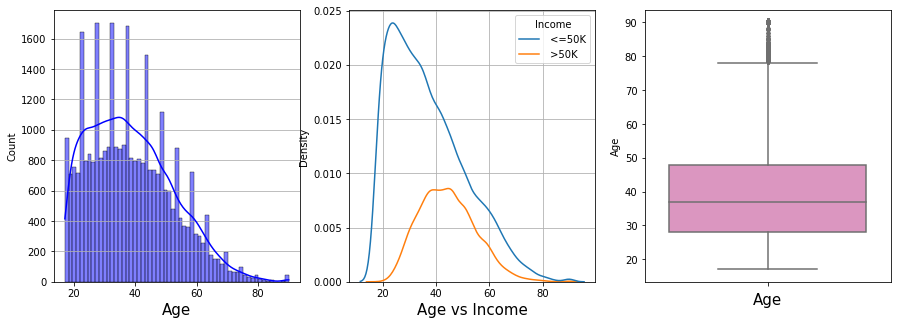

In [480]:
numeric_plot(df,'Age')

<span style="color:blue">Observation-        
- Data Distribution is right skewed.     
- Most of the people who earned less than 50K are generally from age (20-30).                 
- Most of the people who earned more than 50K are generally from age (35-45).                 
- Outliers are present. 

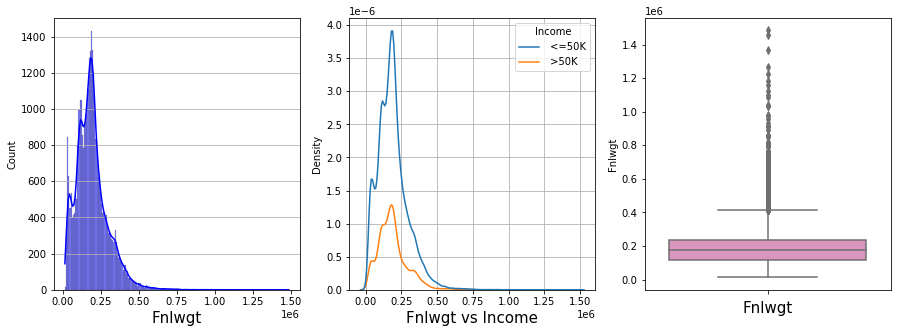

In [481]:
numeric_plot(df,'Fnlwgt')

<span style="color:blue">Observation-        
- Data Distribution is highly right skewed.                    
- Most of the people who earned more than 50K are having Fnlwgt point from (230000-240000).                 
- Outliers are present. 

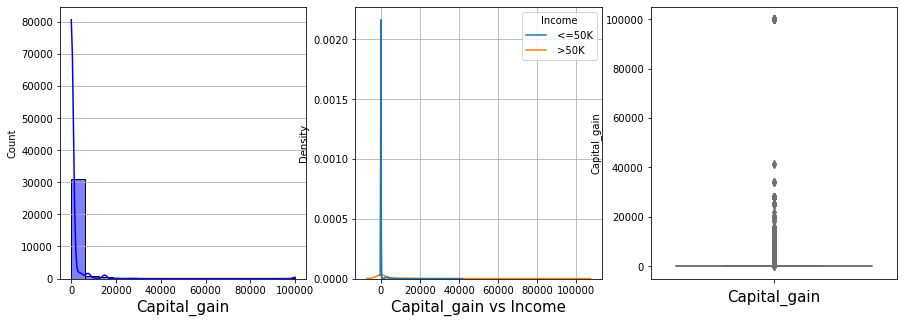

In [482]:
numeric_plot(df,'Capital_gain')

<span style="color:blue">Observation-        
- Data Distribution is highly right skewed.                    
- All higher capital gainer has higher chance to earn more than 50K.         
- Outliers are present. 

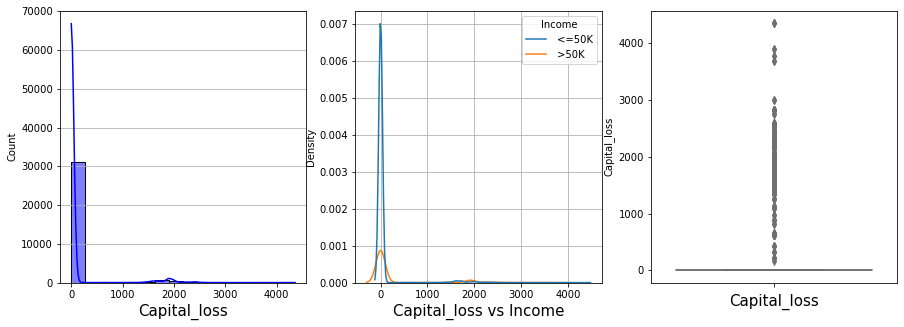

In [483]:
numeric_plot(df,'Capital_loss')

<span style="color:blue">Observation-        
- Data Distribution is highly right skewed.                    
- Less capital loss has high chance of earning more than 50K.         
- Outliers are present. 

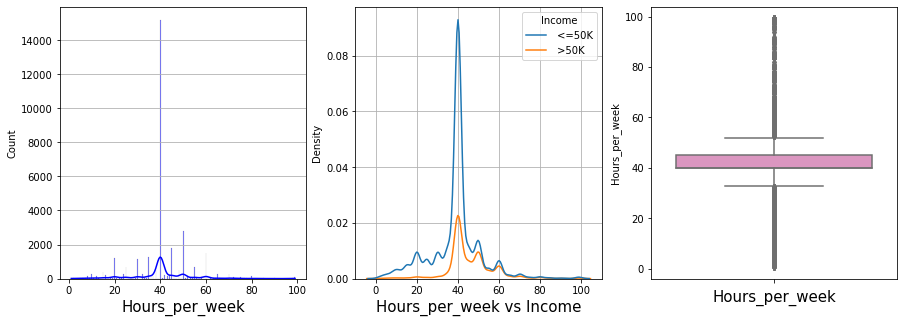

In [484]:
numeric_plot(df,'Hours_per_week')

<span style="color:blue">Observation-        
- Since Hours_per_week is a discrete data column. For discrete data, the concept of skewness may not be as straightforward.                    
- People having working hour per week in between (35-45) has high chance of earning more than 50K .         
- Outliers are present. 

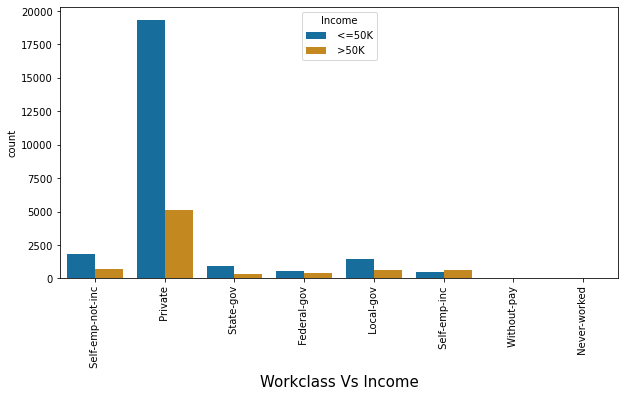

In [485]:
#graph between 'Workclass' and 'Income'
plt.figure(figsize = (10,5))
sns.countplot(x='Workclass', data = df, hue='Income',palette= "colorblind" )
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Workclass Vs Income', fontsize =15)
plt.show() 

<span style="color:blue">Observation-        
- A private workclass has high number of people that earned more than 50k.
- In 'Self-emp-inc' Workclass ,more than 50% of person has highest chance to earned more than 50k

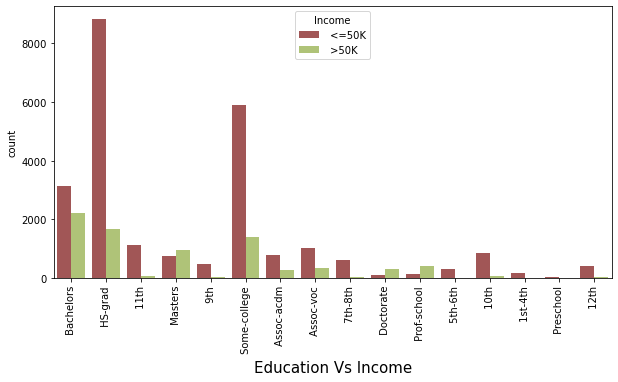

In [486]:
#graph between 'Education' and 'Income'
plt.figure(figsize = (10,5))
sns.countplot(x='Education', data = df, hue='Income',palette= "tab20b_r" )
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Education Vs Income', fontsize =15)
plt.show() 

<span style="color:blue">Observation-        
- Most People did HS-Grad in education.
- As Education level increases there is a high chance to earn more than 50k.  

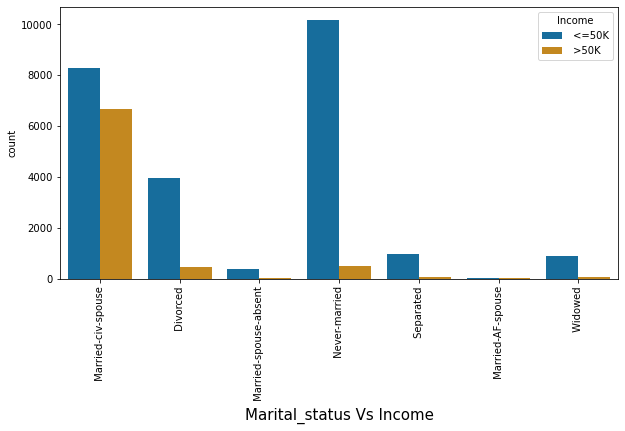

In [487]:
#graph between 'Marital_status' and 'Income'
plt.figure(figsize = (10,5))
sns.countplot(x='Marital_status', data = df, hue='Income',palette= "colorblind" )
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Marital_status Vs Income', fontsize =15)
plt.show() 

<span style="color:blue">Observation-        
- Married-AF-spouse person are very less in number present in dataset .       
- Married-civ-spouse is a marital status that refers to a civilian spouse and has a high chance to earn more than 50k.  

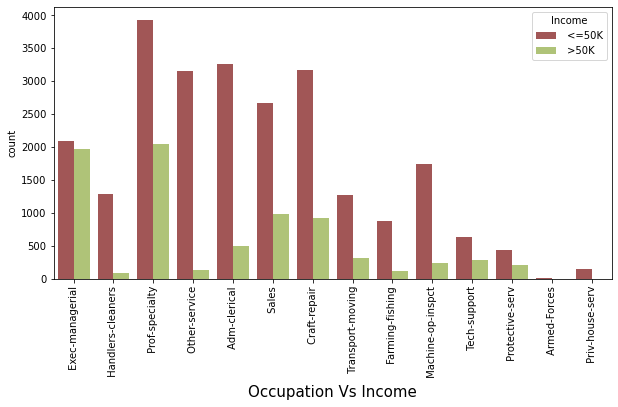

In [488]:
#graph between 'Occupation' and 'Income'
plt.figure(figsize = (10,5))
sns.countplot(x='Occupation', data = df, hue='Income',palette= "tab20b_r" )
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Occupation Vs Income', fontsize =15)
plt.show()

<span style="color:blue">Observation-        
- Exec-managerial has a high chance to earn more than 50k. 
- Low Paying jobs has very less chance to earn more than 50k

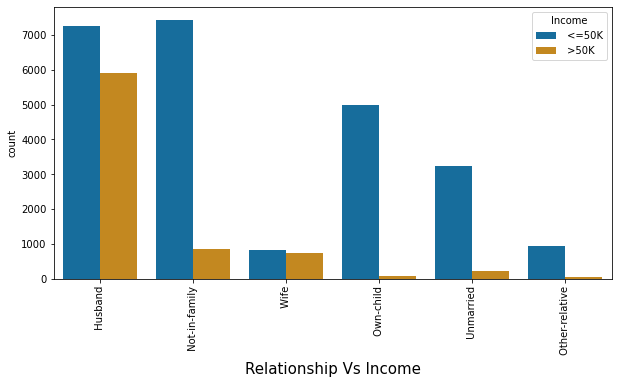

In [489]:
#graph between 'Relationship' and 'Income'
plt.figure(figsize = (10,5))
sns.countplot(x='Relationship', data = df, hue='Income',palette= "colorblind")
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Relationship Vs Income', fontsize =15)
plt.show()

<span style="color:blue">Observation-        
- In dataset person who are 'husband' are very high in number but Wife are more sucessful to earn more than 50K .       


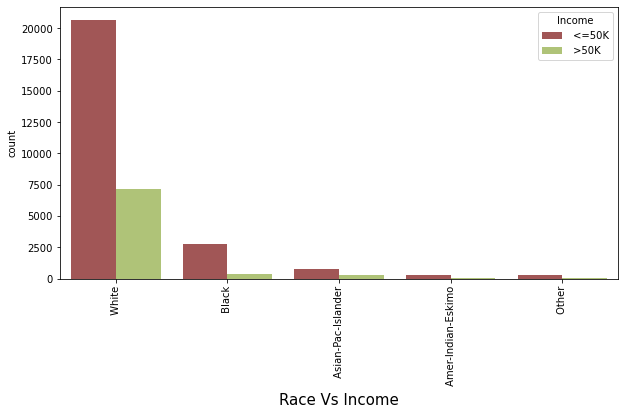

In [490]:
#graph between 'Race' and 'Income'
plt.figure(figsize = (10,5))
sns.countplot(x='Race', data = df, hue='Income',palette= "tab20b_r" )
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Race Vs Income', fontsize =15)
plt.show()

<span style="color:blue">Observation-        
- No Significant relation.       

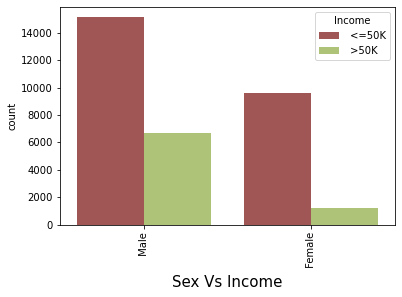

In [491]:
#graph between 'Sex' and 'Income'
sns.countplot(x='Sex', data = df, hue='Income',palette= "tab20b_r" )
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Sex Vs Income', fontsize =15)
plt.show()

<span style="color:blue">Observation-        
- Sucess rate to earn more than 50k is very less in female. 

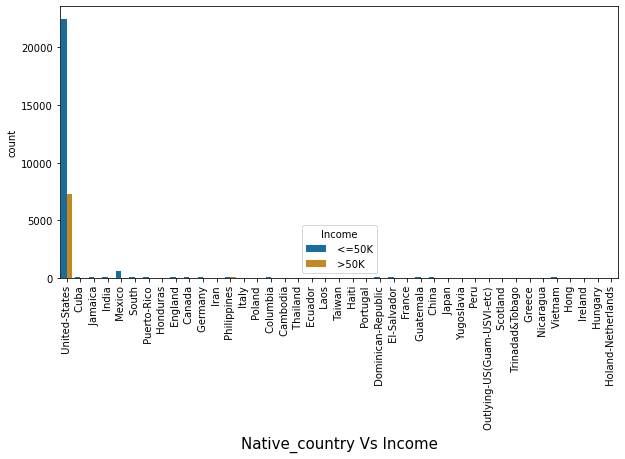

In [492]:
#graph between 'Native_country' and 'Income'
plt.figure(figsize = (10,5))
sns.countplot(x='Native_country', data = df, hue='Income',palette= "colorblind" )
plt.xticks(fontsize=10,rotation =90)
plt.xlabel('Native_country Vs Income', fontsize =15)
plt.show() 

<span style="color:blue">Observation-        
- 90% ,5% of the people belongs to US and Mexico respectively and remaining 5% belongs to rest of the country . 

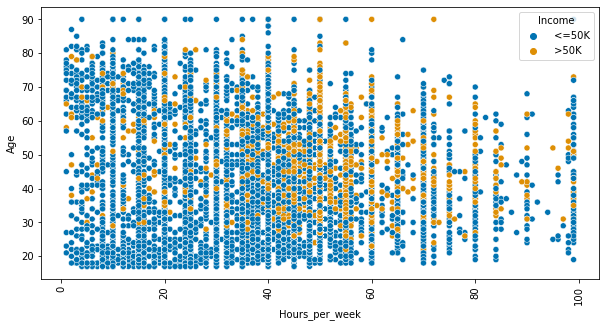

In [493]:
#graph between 'Age' and 'Hours_per_week'
plt.figure(figsize = (10,5))
sns.scatterplot(x='Hours_per_week',y='Age', data = df,hue='Income',palette= "colorblind" )
plt.xticks(fontsize=10,rotation =90)
plt.show()

<span style="color:blue">Observation-        
- No Such Significant relation.       

### MULTIVARIATE ANALYSIS

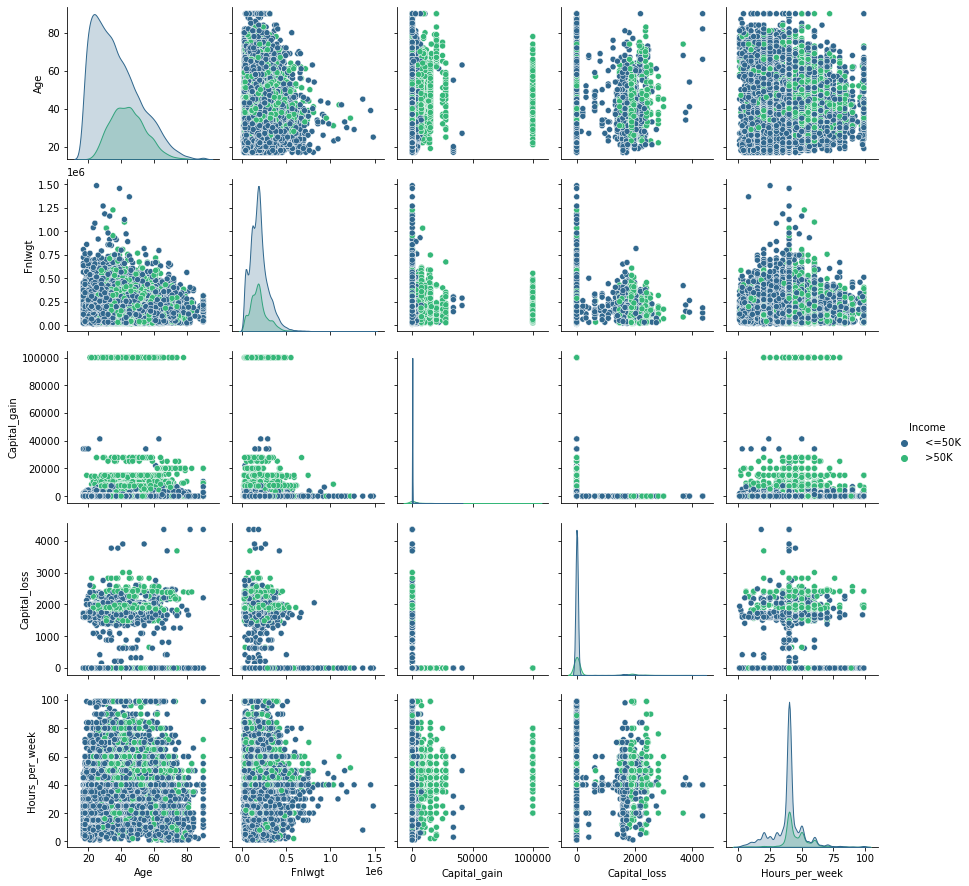

In [494]:
# Multivariate  Analysis 
sns.pairplot( df, hue="Income",palette="viridis")

<span style="color:blue">Observation-        
- Most data points are overlapping each other.       

## <span style="color:purple">Removing Outliers    
Numerical Features has Outliers. Lets remove Outliers by Z-score and IQR (Inter Quantile Method)

In [495]:
#Remove Outliers by zscore
from scipy.stats import zscore
outliers_feature = df[[ 'Age','Fnlwgt', 'Capital_gain','Capital_loss']]
z=np.abs(zscore(outliers_feature)) #.abs() to remove negative values


In [496]:
#Z-score>3
np.where(z>3)

(array([   22,    31,    36, ..., 32486, 32493, 32500], dtype=int64),
 array([3, 3, 1, ..., 1, 2, 0], dtype=int64))

In [497]:
#now removing the data above zscore and creating a new dataframe
df1=df[(z<3).all(axis=1)]
print("New Dataframe having rows and column: " ,df1.shape)
print("New Dataframe column's name: " ,df1.columns)

New Dataframe having rows and column:  (30405, 14)
New Dataframe column's name:  Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')


In [498]:
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage with Z-score method: 6.549668059995082


In [499]:
#Remove Outliers by IQR (Inter Quantile Method)

#1st Quantile
q1=outliers_feature.quantile(0.25)

#3rd Quantile
q3=outliers_feature.quantile(0.75)

#calculating IQR
iqr=q3-q1

df2=df[~((df < (q1 - 1.5*iqr ))|(df > (q3 + 1.5*iqr ))).any(axis=1)]

In [500]:
print("Data Loss Percentage with Z-score method:",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage with Z-score method: 16.08064912712073


<span style="color:blue">Conclusion -Data Loss Percentage  with IQR method is very high as compared with Z-score . So i go with z-score

In [501]:
#Storing Dataframe with Z-score method in old dataframe
df=df1

In [502]:
#reset the index after removing outliers values
df.reset_index( drop=True, inplace=True)
df.shape

(30405, 14)

## <span style="color:purple">Removing Skewness

In [503]:
# Checking Skewness  
df.skew()

Age                0.491852
Fnlwgt             0.632333
Capital_gain       4.953124
Capital_loss      29.772856
Hours_per_week     0.236113
dtype: float64

<span style="color:blue">Observation- We have high skewness in 'Capital_loss','Capital_gain' column.            
 Lets remove skewness.

In [504]:
#Removing Skewness for 'Capital_loss' using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")
skewed_feature=pt.fit_transform(df[['Capital_loss']]+0.000001)
df['Capital_loss']=skewed_feature

In [505]:
#Removing Skewness for 'Capital_gain' using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")
skewed_feature=pt.fit_transform(df[['Capital_gain']]+0.000001)
df['Capital_gain']=skewed_feature

In [506]:
# Checking Skewness again
df.skew()

Age                0.491852
Fnlwgt             0.632333
Capital_gain       3.079565
Capital_loss      24.851011
Hours_per_week     0.236113
dtype: float64

<span style="color:BLUE">Observation -Hence we removed skewness at some limit. Let's go with this value.

## <span style="color:purple">Encoding Categorical Column

In [507]:
#Encoding Column using labelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Income'] = LE.fit_transform(df['Income'])
df['Native_country'] = LE.fit_transform(df['Native_country'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Marital_status'] = LE.fit_transform(df['Marital_status'])

In [508]:
#Since Workclass,Education,Occupation are Ordinal feature 
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,-0.296239,-0.040177,13,37,0
1,38,3,215646,11,0,5,1,4,1,-0.296239,-0.040177,40,37,0
2,53,3,234721,1,2,5,0,2,1,-0.296239,-0.040177,40,37,0
3,28,3,338409,9,2,9,5,2,0,-0.296239,-0.040177,40,4,0
4,37,3,284582,12,2,3,5,4,0,-0.296239,-0.040177,40,37,0


<span style="color:BLUE">Observation -Hence we encoded categorical column sucessfully. Let's go with this value.

## <span style="color:purple">Correlation between target variable and Independent variable

<AxesSubplot:>

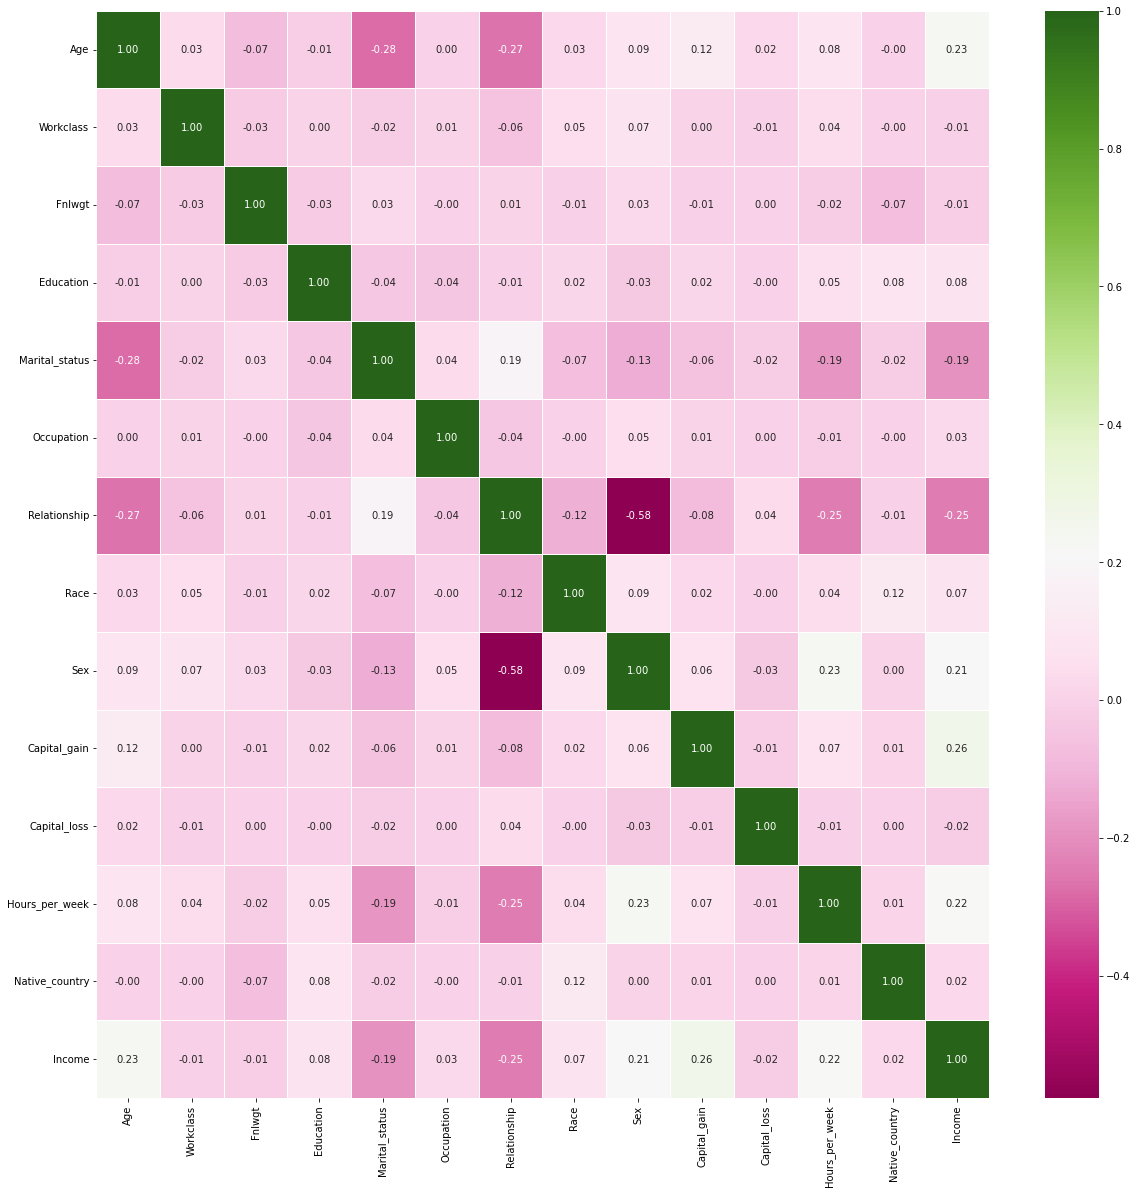

In [509]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap="PiYG")

<span style="color:BLUE">Observation -                         
- No two columns are highly correlated with each other,which cause no Multicollinearity occur. But Lets check again Multicollinearity by VIF method.

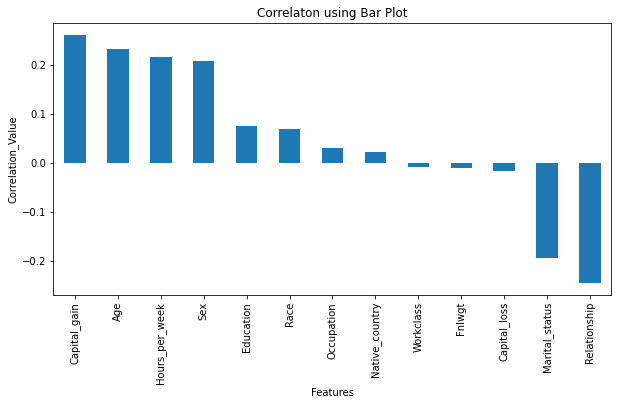

In [510]:
#Visualizing Correlaton using Bar Plot
plt.figure(figsize = (15,5))
df_corr = df.corr()
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.xticks(fontsize =15)
plt.xlabel('Features', fontsize =20)
plt.ylabel('Correlation_Value', fontsize =15)
plt.title('Correlaton using Bar Plot', fontsize =25)
plt.show()

<span style="color:BLUE">Observation -                 
- Column 'Workclass' has  very very weak correlated with 'Income'. 
Let's drop these value.

In [511]:
#Dropping  'Workclass' column
df.drop(['Workclass'],axis=1,inplace=True)
df.shape

(30405, 13)

## <span style="color:purple">Seperating Feature and Label

In [512]:
#Seperating Feature and label into x and y
x=df.drop(["Income"],axis=1)
y=df["Income"]

print("Feature Dimension :" ,x.shape)
print("Target Dimension :" ,y.shape)

Feature Dimension : (30405, 12)
Target Dimension : (30405,)


## <span style="color:purple">Feature Scaling Using Standard Scaler

In [513]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

## <span style="color:purple">Detecting Multicollinearity Using a Variance Inflation Factor (VIF)

In [514]:
#finding VIF in each scaled column i.e x_scaled.shape[1](1/1- R^2 )
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame() 

vif["VIF"] = [variance_inflation_factor(x_scaled.values, i) for i in range(len(x_scaled.columns))]
vif["Features"] = x_scaled.columns
vif

,VIF,Features
0,1.173262,Age
1,1.012456,Fnlwgt
2,1.015430,Education
3,1.133999,Marital_status
4,1.006542,Occupation
5,1.661257,Relationship
6,1.030845,Race
7,1.540165,Sex
8,1.021278,Capital_gain
9,1.002845,Capital_loss


<span style="color:blue">Observation - THe VIF value is below 10 in all feature ,Hence no multicollinearity observed. 
Lets go ahead with these feature.

## <span style="color:purple">Feature Selection 

###  Feature Selection By Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features

In [515]:
from sklearn.feature_selection import VarianceThreshold
var_threshold=VarianceThreshold(threshold=0)
var_threshold.fit(x_scaled)

VarianceThreshold(threshold=0)

In [516]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [517]:
x_scaled.columns[var_threshold.get_support()]

Index(['Age', 'Fnlwgt', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country'],
      dtype='object')

In [518]:
# taking  out  all the  constant  columns 
consant_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(consant_columns))

0


<span style="color:blue">Obsevation- We can see that No columnn are constant column .Lets check again by KBest method

### Feature Selection by SelectKBest

In [519]:
from sklearn.feature_selection import SelectKBest, f_classif

best_fit = SelectKBest(score_func = f_classif, k =12)
fit = best_fit.fit(x_scaled,y)

#Craete DataFrame for score and column
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_scaled.columns)

#Concatenate the score and column
featureScores = pd.concat([df_columns,df_scores],axis = 1)
featureScores.columns = ['Feature', 'Score']

#print the top 11 feature based on score
print(featureScores.nlargest(12,'Score'))

           Feature        Score
8     Capital_gain  2224.801030
5     Relationship  1945.182315
0              Age  1751.536032
10  Hours_per_week  1507.930371
7              Sex  1392.041850
3   Marital_status  1193.269744
2        Education   175.200580
6             Race   151.760247
4       Occupation    27.967855
11  Native_country    14.330831
9     Capital_loss     9.383618
1           Fnlwgt     3.460194


<span style="color:blue">Obsevation- 'Occupation','Native_country','Capital_loss','Fnlwgt' has very low score .Lets drop these value.

In [520]:
#Dropping coluumns
x_scaled.drop(['Occupation','Native_country','Capital_loss','Fnlwgt'],axis=1 ,inplace =True)
x_scaled.shape

(30405, 8)

## <span style="color:purple">Data Balance by Oversampling

In [521]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x_scaled,y)

y.value_counts()

0    23633
1    23633
Name: Income, dtype: int64

<span style="color:blue">Conclusion -Hence Data is balanced .

## <span style="color:Purple">Split the data into training and testing sets

In [522]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split (x, y, test_size = .30, random_state = i)


print("Total Size Of Feature in Dataset :",x.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (47266, 8)
Total Size Of Training Feature Dataset :  (33086, 8)
Total Size Of Testing Feature Dataset :  (14180, 8)
Total Size Of Label in Dataset : (47266,)
Total Size Of Training Label Dataset :  (33086,)
Total Size Of Testing Label Dataset :  (14180,)


## <span style="color:purple">Create one function and call as many as times to check accuracy and overfitting of different model

In [523]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

def classification_model(model_name,x_train,x_test,y_train,y_test, train=True):
    if train: #checking training accuracy
        y_pred_train=model_name.predict(x_train)
        
        print("\n*********************Train Result*********************")
        
        print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
        
    elif train==False: #checking testing accuracy
        y_pred = model_name.predict(x_test)
        
        print("\n*********************Test Result*********************")
        
        print("Accuracy on test data:", accuracy_score(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred)) 
        
        print("\n*********************Cross-Validation score*********************")
        print("Overall Cross-Validation score :",cross_val_score(model_name,x,y,cv=5).mean())
        
        print("\n************Difference in CV score and Accuracy score***********")
        deviation= ((accuracy_score(y_test, y_pred))-(cross_val_score(model_name,x,y,cv=5).mean()))
        print("Difference",deviation)
        

# <span style="color:purple">MODELS

## <span style="color:purple">LogisticRegression

In [524]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(logreg,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(logreg,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.7241431421144895

*********************Test Result*********************
Accuracy on test data: 0.7264456981664316
Confusion Matrix:
 [[4907 2166]
 [1713 5394]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72      7073
           1       0.71      0.76      0.74      7107

    accuracy                           0.73     14180
   macro avg       0.73      0.73      0.73     14180
weighted avg       0.73      0.73      0.73     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7249185827577904

************Difference in CV score and Accuracy score***********
Difference 0.0015271154086411443


## <span style="color:purple">KNeighborsClassifier

In [525]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(knn,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(knn,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.8613915251163634

*********************Test Result*********************
Accuracy on test data: 0.8227080394922426
Confusion Matrix:
 [[5488 1585]
 [ 929 6178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.81      7073
           1       0.80      0.87      0.83      7107

    accuracy                           0.82     14180
   macro avg       0.83      0.82      0.82     14180
weighted avg       0.83      0.82      0.82     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7987990331554924

************Difference in CV score and Accuracy score***********
Difference 0.023909006336750194


## <span style="color:purple">DecisionTreeClassifier

In [526]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(dtc,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(dtc,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.9373451006467992

*********************Test Result*********************
Accuracy on test data: 0.8428067700987306
Confusion Matrix:
 [[5842 1231]
 [ 998 6109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      7073
           1       0.83      0.86      0.85      7107

    accuracy                           0.84     14180
   macro avg       0.84      0.84      0.84     14180
weighted avg       0.84      0.84      0.84     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.8489203139239121

************Difference in CV score and Accuracy score***********
Difference -0.00575387412351358


## <span style="color:purple">Support Vector Machines (SVM)

In [527]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(svc,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(svc,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.7983134860666142

*********************Test Result*********************
Accuracy on test data: 0.8005641748942172
Confusion Matrix:
 [[5114 1959]
 [ 869 6238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78      7073
           1       0.76      0.88      0.82      7107

    accuracy                           0.80     14180
   macro avg       0.81      0.80      0.80     14180
weighted avg       0.81      0.80      0.80     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7965133102250093

************Difference in CV score and Accuracy score***********
Difference 0.004050864669207899


## <span style="color:purple">AdaBoostClassifier

In [528]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
#Call the function and pass datset to check train and test score 
classification_model(ada,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(ada,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.8287493199540591

*********************Test Result*********************
Accuracy on test data: 0.8296897038081805
Confusion Matrix:
 [[5682 1391]
 [1024 6083]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      7073
           1       0.81      0.86      0.83      7107

    accuracy                           0.83     14180
   macro avg       0.83      0.83      0.83     14180
weighted avg       0.83      0.83      0.83     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.8293914951977237

************Difference in CV score and Accuracy score***********
Difference 0.00029820861045681823


## <span style="color:purple">RandomForestClassifier

In [529]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
#Call the function and pass datset to check train and test score 
classification_model(RFC,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(RFC,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.9373451006467992

*********************Test Result*********************
Accuracy on test data: 0.8596614950634697
Confusion Matrix:
 [[5911 1162]
 [ 828 6279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      7073
           1       0.84      0.88      0.86      7107

    accuracy                           0.86     14180
   macro avg       0.86      0.86      0.86     14180
weighted avg       0.86      0.86      0.86     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.8665648972119555

************Difference in CV score and Accuracy score***********
Difference -0.006332175066670609


## <span style="color:purple">GradientBoostingClassifier 

In [530]:
from sklearn.ensemble import GradientBoostingClassifier 
gbr = GradientBoostingClassifier()
gbr.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(gbr,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(gbr,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.8444357129903887

*********************Test Result*********************
Accuracy on test data: 0.8461212976022567
Confusion Matrix:
 [[5681 1392]
 [ 790 6317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      7073
           1       0.82      0.89      0.85      7107

    accuracy                           0.85     14180
   macro avg       0.85      0.85      0.85     14180
weighted avg       0.85      0.85      0.85     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.8422337977936831

************Difference in CV score and Accuracy score***********
Difference 0.0038874998085736134


## <span style="color:purple">Naive Bayes Classifier

In [531]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train, y_train)

#Call the function and pass datset to check train and test score 
classification_model(nb,x_train,x_test,y_train,y_test, train=True) #This is training score
classification_model(nb,x_train,x_test,y_train,y_test, train=False) #This is testing score


*********************Train Result*********************
Accuracy on train data: 0.7548509943782868

*********************Test Result*********************
Accuracy on test data: 0.7605077574047955
Confusion Matrix:
 [[5194 1879]
 [1517 5590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      7073
           1       0.75      0.79      0.77      7107

    accuracy                           0.76     14180
   macro avg       0.76      0.76      0.76     14180
weighted avg       0.76      0.76      0.76     14180


*********************Cross-Validation score*********************
Overall Cross-Validation score : 0.7567172416657642

************Difference in CV score and Accuracy score***********
Difference 0.0037905157390313304


### <span style="color:green">Conclusion- On basis of Type1, Type2 Error and Accuracy score we can conclude that out of all model, RandomForestClassifier & GradientBoostingClassifier perform best for this dataset having accuracy 86% and 85% respectively . So we select RandomForestClassifier & GradientBoostingClassifier for Hyperparameter Tunning

## <span style="color:purple">AUC- ROC Curve

In [532]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

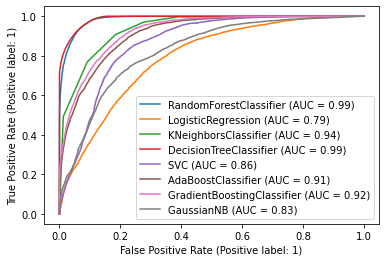

In [533]:
#For Training Data
disp = plot_roc_curve (RFC, x_train, y_train,)
plot_roc_curve (logreg, x_train, y_train, ax = disp.ax_)
plot_roc_curve (knn, x_train, y_train, ax = disp.ax_)
plot_roc_curve (dtc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (svc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (ada, x_train, y_train, ax = disp.ax_)
plot_roc_curve (gbr, x_train, y_train, ax = disp.ax_)
plot_roc_curve (nb, x_train, y_train, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

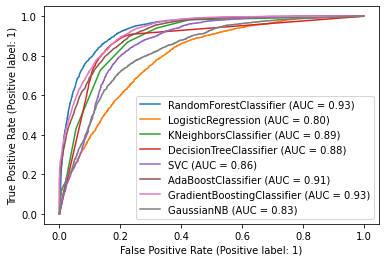

In [534]:
#For Tetsing Data
disp = plot_roc_curve (RFC, x_test, y_test)
plot_roc_curve (logreg, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plot_roc_curve (gbr, x_test, y_test, ax = disp.ax_)
plot_roc_curve (nb, x_test, y_test, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

### <span style="color:green">Here we see that RandomForestClassifier & GradientBoostingClassifier both having high AUC curve (i.e 0.93).

## <span style="color:purple">HyperParameter Tuning for RandomForestClassifier model

In [536]:
from sklearn.model_selection import  GridSearchCV

In [537]:
RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [538]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    
}

In [539]:
grid_randomfor = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv= 5)
grid_randomfor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [540]:
grid_randomfor.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [541]:
rfc = RandomForestClassifier( criterion= 'gini', max_depth= 8,n_estimators= 500, max_features= "log2")
rfc.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=rfc.predict(x_train)
# Predict the target variable for the test data
y_pred = rfc.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.8320739889983679
Accuracy on test data: 0.8306064880112835
Confusion Matrix:
 [[5492 1581]
 [ 821 6286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      7073
           1       0.80      0.88      0.84      7107

    accuracy                           0.83     14180
   macro avg       0.83      0.83      0.83     14180
weighted avg       0.83      0.83      0.83     14180



### <span style="color:green">Here we see that after hperparameter tunning of RandomForestClassifier, accuarcy slightly decreases to 83% .Hence don't considered it.

## <span style="color:purple">HyperParameter Tuning for GradientBoostingClassifier model

In [542]:
gbr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [543]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

In [544]:
grid_gbr = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid,cv= 5)
grid_gbr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]})

In [545]:
grid_gbr.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}

In [546]:
GBR = GradientBoostingClassifier( learning_rate= 0.2, max_depth= 5, n_estimators= 200, subsample= 0.9)
GBR.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=GBR.predict(x_train)
# Predict the target variable for the test data
y_pred = GBR.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.9021640573052047
Accuracy on test data: 0.8814527503526093
Confusion Matrix:
 [[6047 1026]
 [ 655 6452]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      7073
           1       0.86      0.91      0.88      7107

    accuracy                           0.88     14180
   macro avg       0.88      0.88      0.88     14180
weighted avg       0.88      0.88      0.88     14180



### <span style="color:green">Here we see that after hperparameter tunning of GradientBoostingClassifier, accuarcy increases to 88%. Hence i considered GradientBoostingClassifier as our final model. Let's save the model

In [547]:
#saving Model
import joblib
joblib.dump(GBR,'Model to predict whether a person makes over $50K a year ')

['Model to predict whether a person makes over $50K a year ']

In [548]:
#Model Prediction
GBR_model = joblib.load('Model to predict whether a person makes over $50K a year ')
income = GBR_model.predict(x_test)
income

array([1, 1, 0, ..., 1, 0, 1])

## <span style="color:purple">Prediction Comparision

In [550]:
test_data = np.array(y_test)
income_pred = pd.DataFrame({'predicted': income,'original':test_data})
income_pred

,predicted,original
0,1,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
14175,1,1
14176,1,1
14177,1,1
14178,0,0


## <span style="color:green"> As we can see, predicted and original values are almost same.